In [100]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Смотрим в какой директории находимся
os.getcwd()

'/Users/evgeniyburovik/Documents/Courses/les_4'

In [56]:
# Определяем директори внитри даты и удаляем системные данные
[i for i in os.listdir('/Users/evgeniyburovik/Documents/Courses/les_4/data') if not i.startswith('.')] 

['2020-12-06',
 '2020-12-08',
 '2020-12-09',
 '2020-12-07',
 '2020-12-05',
 '2020-12-03',
 '2020-12-04']

In [4]:
# Делаем небольшой скетч для автоматизации сбора данных
[i for i in os.listdir('/Users/evgeniyburovik/Documents/Courses/les_4/data/2020-12-06') if not i.startswith('.')] 

['Vasiliy_Fedorov']

In [5]:
p = '/Users/evgeniyburovik/Documents/Courses/les_4/data/2020-12-06/Vasiliy_Fedorov/data.csv'

In [6]:
pd.read_csv(p)

,Unnamed: 0,product_id,quantity
0,0,56,4
1,1,97,3
2,2,79,3
3,3,29,5


In [68]:
# Создаем вложенные циклы для автоматизации сбора данных из дерева папок

date_len = [i for i in os.listdir('/Users/evgeniyburovik/Documents/Courses/les_4/data') if not i.startswith('.')]
date_pat = '/Users/evgeniyburovik/Documents/Courses/les_4/data/'
df = pd.DataFrame()
for date in date_len:
    for name in [i for i in os.listdir('/Users/evgeniyburovik/Documents/Courses/les_4/data/'+date) if not i.startswith('.')]:
        for data in [i for i in os.listdir('/Users/evgeniyburovik/Documents/Courses/les_4/data/'+date+'/'+name) if not i.startswith('.')]: 
            # Делаем список разделяя путь по слешу, для добавления имени и даты в датасет
            name_date = (date_pat + date+'/'+name+'/'+data).split('/')
            csv_df = pd.read_csv(date_pat + date+'/'+name+'/'+data)
            csv_df['name'] = name_date[-2]
            csv_df['date'] = name_date[-3]
            df = df.append(csv_df)

In [69]:
df = df.reset_index().drop(columns=['Unnamed: 0', 'index'])

In [70]:
df

,product_id,quantity,name,date
0,56,4,Vasiliy_Fedorov,2020-12-06
1,97,3,Vasiliy_Fedorov,2020-12-06
2,79,3,Vasiliy_Fedorov,2020-12-06
3,29,5,Vasiliy_Fedorov,2020-12-06
4,73,5,Alexey_Fedorov,2020-12-08
...,...,...,...,...
156,3,4,Kirill_Fedorov,2020-12-04
157,89,5,Kirill_Fedorov,2020-12-04
158,75,2,Kirill_Fedorov,2020-12-04
159,41,5,Kirill_Fedorov,2020-12-04


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  161 non-null    int64 
 1   quantity    161 non-null    int64 
 2   name        161 non-null    object
 3   date        161 non-null    object
dtypes: int64(2), object(2)
memory usage: 5.2+ KB


In [61]:
df.quantity.sum()

480

In [95]:
', '.join([str(client) for client in df.groupby('name', as_index=False)\
            .agg({'quantity': 'sum'})\
            .sort_values('quantity', ascending=False)\
            .query('quantity == 52')\
            .sort_values('name')\
            .name.tolist()])

'Alexey_Smirnov, Petr_Smirnov'

In [118]:
top_product = df.groupby('product_id', as_index=False)\
.agg({'quantity': 'sum'})\
.sort_values('quantity', ascending=False)\
.iloc[0:10]
top_product

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

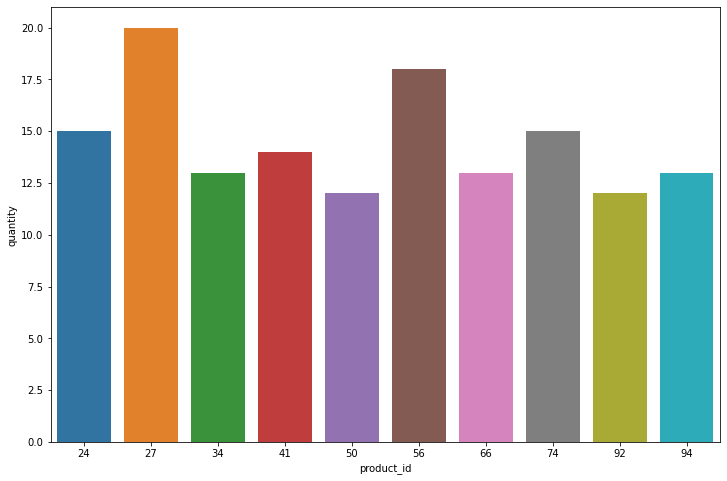

In [108]:
plt.figure(figsize=(12, 8))
sns.barplot(data = top_product, x = 'product_id', y = 'quantity')

In [119]:
top_product_day = df.groupby('date', as_index=False)\
.agg({'quantity': 'sum'})\
.sort_values('quantity', ascending=False)
top_product_day

,date,quantity
1,2020-12-04,113
4,2020-12-07,94
6,2020-12-09,69
5,2020-12-08,68
2,2020-12-05,61
0,2020-12-03,60
3,2020-12-06,15


In [120]:
repeat_purchases = df.drop_duplicates(subset= ['name', 'date', 'product_id'])

In [122]:
repeat_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 160
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  160 non-null    int64 
 1   quantity    160 non-null    int64 
 2   name        160 non-null    object
 3   date        160 non-null    object
dtypes: int64(2), object(2)
memory usage: 6.2+ KB


In [128]:
repeat_purchases.groupby(['name', 'product_id'], as_index=False).agg({'date':'count'}).sort_values('date', ascending=False)

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
0,Alexey_Fedorov,13,1
109,Petr_Smirnov,21,1
103,Petr_Petrov,64,1
...,...,...,...
54,Anton_Smirnov,28,1
55,Anton_Smirnov,33,1
56,Anton_Smirnov,34,1
57,Anton_Smirnov,40,1
